# **EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split

import re
from nltk.stem import PorterStemmer

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import spacy

from collections import Counter

from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


**Context**
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.


**LABEL**

label '1' denotes the tweet is racist/sexist 
label '0' denotes the tweet is not racist/sexist

your objective is to predict the labels on the test dataset.

**Content**
Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Twitter NLP/train.csv")
df.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


we have total 31962 Data point


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Data do not contain any NAN values

In [ ]:
Total = df.label.count()
zeros = df.label.value_counts()[0]
ones  = df.label.value_counts()[1]
print(f"Dataset contain {round(zeros/Total*100 , 2)} % of label which have zeros")
print(f"Dataset contain {round(ones/Total*100 , 2)} % of label which have ones")

Dataset contain 92.99 % of label which have zeros
Dataset contain 7.01 % of label which have ones


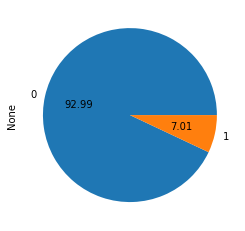

In [ ]:
df.groupby('label').size().plot(kind='pie', autopct='%.2f')

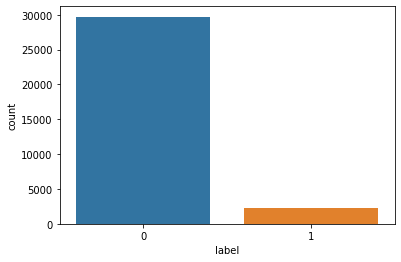

In [ ]:
sns.countplot(df.label)

Dataset is imbalance 

In [ ]:
text = list(df["tweet"][0:10])
text

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "the next school year is the year for exams.ð\x9f\x98¯ can't think about that ð\x9f\x98\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ ',
 " @user @user welcome here !  i'm   it's so #gr8 ! "]

tweet contain lot of symobols , char , numbers.

so first i will clean text

In [ ]:
def potter_text(words):
  ps = PorterStemmer()
  words=words.split() 

  cw=[]
  for w in words:
    cw.append(ps.stem(w))
  
  clean_text=" ".join(cw)
  return clean_text


def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " I am", phrase)
    return phrase

stop_words =stopwords.words('english')

In [ ]:
stop_words =stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def stopword_removal(text):
  #removing stopwords from text
  word_tokens = word_tokenize(text)

  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

  return " ".join(filtered_sentence)

In [ ]:
text = list(df["tweet"][40:50])
clean_text = []
for i in text:
    #printing original sentence
    print(i)

    #lowercasing text
    i = i.lower()

    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)

    #removing @user word
    i  = re.sub(r'\s*[@]+\w+\s*', ' ', i)

    #remove hashtag words
    i =re.sub(r'\s*[#]+\w+\s*', '', i)

    # removing symbols from text
    i = re.sub(r'[^\w]', ' ', i)

    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)

    #reomving ! @ # $ ð from sentence
    i = re.sub('[!@#$ð]', ' ',i)

    #removing numbers from sentence
    i = re.sub("\d", ' ', i )

    # #removing words which lenght is 10<
    # i = re.sub(r'\b\w{11,50}\b', ' ', i )

    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , "a").replace("ï"  , "i")

    #removing stopwords
    i = stopword_removal(i)

    # converting same meaning words into single word notation
    i = potter_text(i)

    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)


    print(i)
    print(100 * "*")

when you finally finish a book you've been working on for awhile...  #bookworm #ontothenextnovel 
final finish book work awhil
****************************************************************************************************
yup, being a knicks fan is hard, so its easier to just be an nba fan when the playoffs roll around ð 
yup knick fan hard easier nba fan playoff roll around
****************************************************************************************************
there is life after social networking. embrace each day. be   
life social network embrac day
****************************************************************************************************
my mom shares the same bihday as @user   bihday snake! see you this weekend ðð¼
mom share bihday bihday snake see weekend ¼
****************************************************************************************************
lovely echeveria blooms#flowers #grow #gardening #iphonesia #bliss #blooms #basilicabot

In [ ]:
def preprocessing_text(i):   
    #lowercasing text
    i = i.lower()
    # "won\'t", "will not"  , "can\'t", "can not" , "n\'t", " not"....
    i = decontracted(i)
    #removing @user word
    i = re.sub(r'\s*[@]+\w+\s*', ' ', i)
    #remove hashtag words
    i =re.sub(r'\s*[#]+\w+\s*', ' ', i)
    # removing symbols from text
    i = re.sub(r'[^\w]', ' ', i)
    #removing 1 letter word from sentence
    i = re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', ' ',i)
    #reomving ! @ # $ ð from sentence
    i = re.sub('[!@#$ð]', ' ',i)
    #removing numbers from sentence
    i = re.sub("\d", ' ', i )
    # #removing words which lenght is 10<
    # i = re.sub(r'\b\w{11,50}\b', ' ', i )
    #removing some unique char
    i =  i.replace('_', ' ').replace("-"  , " ").replace("â"  , "a").replace("ï"  , "i")
    #removing stopwords
    i = stopword_removal(i)
    # converting same meaning words into single word notation
    i = potter_text(i)
    #removing Extra spaces 
    i = re.sub("\s\s+" , " ", i)
    return i

In [ ]:
preprocessing_text("@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  ")

'call middl school build wall chant'

In [ ]:
clean_text = []

for i in tqdm(df["tweet"]):
  clean_text.append(preprocessing_text(i))

df["clean_tweet"]=clean_text

df.head(2)

100%|██████████| 31962/31962 [00:11<00:00, 2856.98it/s]


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct
1,2,0,@user @user thanks for #lyft credit i can't us...,thank credit use caus offer wheelchair van pdx


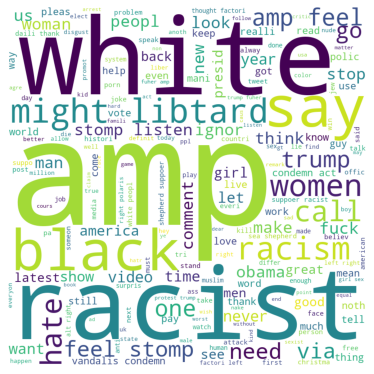

In [ ]:
df1 = df[df["label"]==1]

words = ""
for i in  df1["clean_tweet"]:
    words += "".join(i)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 8).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (5 , 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

hate , amp , trump , obama , white , black , racist , labtard, liber are some words common  in offensive  tweet.

"Amplifier" is the most common definition for AMP on Snapchat, WhatsApp, Facebook, Twitter, Instagram, and TikTok

**AMP**

Definition:	Amplifier

Type:	Slang Word (Jargon)

Typical Users:	Adults and Teenagers

**What does a Liptard mean?**

Libtard is an insult usually used by conservative trolls online to characterize liberals as stupid

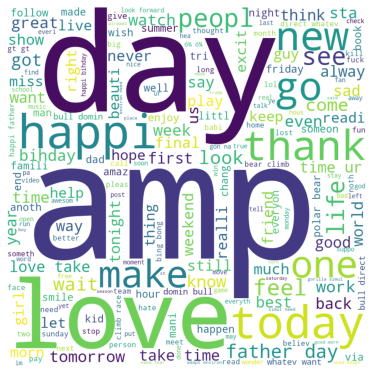

In [ ]:
df0 = df[df["label"]==0]

words = ""
for i in  df0["clean_tweet"]:
    words += "".join(i)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 8).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (5 , 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

happy , amp , love , today , new , life , smile , thanks day are some words common  in non offensive  tweet.

ENITITY EDA

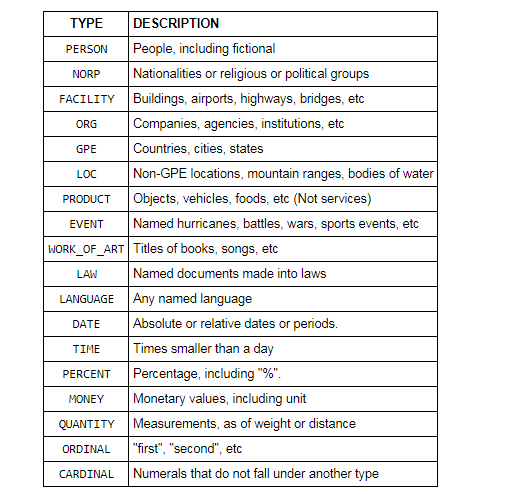

In [ ]:
NER = spacy.load("en_core_web_sm")

In [ ]:
NER.entity

In [ ]:
dict_offencive = {"text":[] , 
                  "entity" : []}

for tweet in tqdm(df1["clean_tweet"]):

  text  = stopword_removal(tweet)

  doc = NER(text)

  dict_offencive["text"].extend(list(doc.ents))
  dict_offencive["entity"].extend([doc.ents[0].label_ for i in range(len(doc.ents))])

df_offencive = pd.DataFrame(dict_offencive)

print(df_offencive.shape)
df_offencive.head(5)

100%|██████████| 2242/2242 [00:20<00:00, 109.27it/s]

(1395, 2)


,text,entity
0,"(unbeliev, st, centuri)",PERSON
1,(someth),PERSON
2,"(white, establish, blk, folx)",ORG
3,(one),CARDINAL
4,(million),CARDINAL


In [ ]:
dict_no_offencive = {"text":[] , 
                  "entity" : []}

for tweet in tqdm(df0["clean_tweet"]):

  text  = stopword_removal(tweet)

  doc = NER(text)

  dict_no_offencive["text"].extend(list(doc.ents))
  dict_no_offencive["entity"].extend([doc.ents[0].label_ for i in range(len(doc.ents))])

df_no_offencive = pd.DataFrame(dict_no_offencive)

df_no_offencive.head(5)

100%|██████████| 29720/29720 [04:25<00:00, 112.14it/s]


,text,entity
0,(dysfunct),PERSON
1,"(wheelchair, van, pdx)",PERSON
2,(bihday),DATE
3,(chao),PERSON
4,(tomorrow),DATE


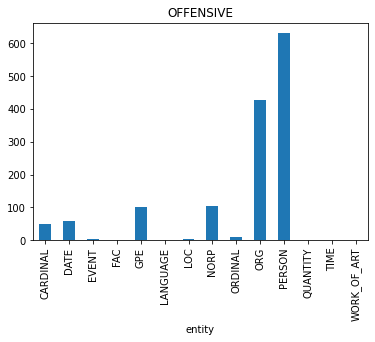

In [ ]:
entity_offensive = df_offencive.groupby("entity").count()['text']

entity_offensive.plot.bar(orientation='vertical')
plt.title('OFFENSIVE')
plt.show()

NORP  - nationalist , religious and political grop

ORG  - company , agency , institution

GPE & NORP is most common in offensive data

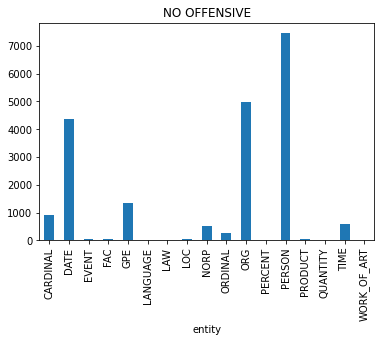

In [ ]:
no_entity_offensive = df_no_offencive.groupby("entity").count()['text']

no_entity_offensive.plot.bar(orientation='vertical')
plt.title('NO OFFENSIVE')
plt.show()

ORG , PERSON are most common entity both offensive and no_offensive

DTAE & TIME are common entity in non offensive data

lets visulaize common words in entity

In [ ]:
def unique_words(entity , df):
  df = df[df["entity"]==entity]["text"]

  word_list = []

  for i in df:
    word_list.extend(str(i).split(" "))
  
  values, counts = np.unique(word_list , return_counts=True)
  
  df =  pd.DataFrame(list(zip(values, counts)), columns =[entity, 'count'])
  return  df.sort_values(by=['count'], ascending=False).head(10)

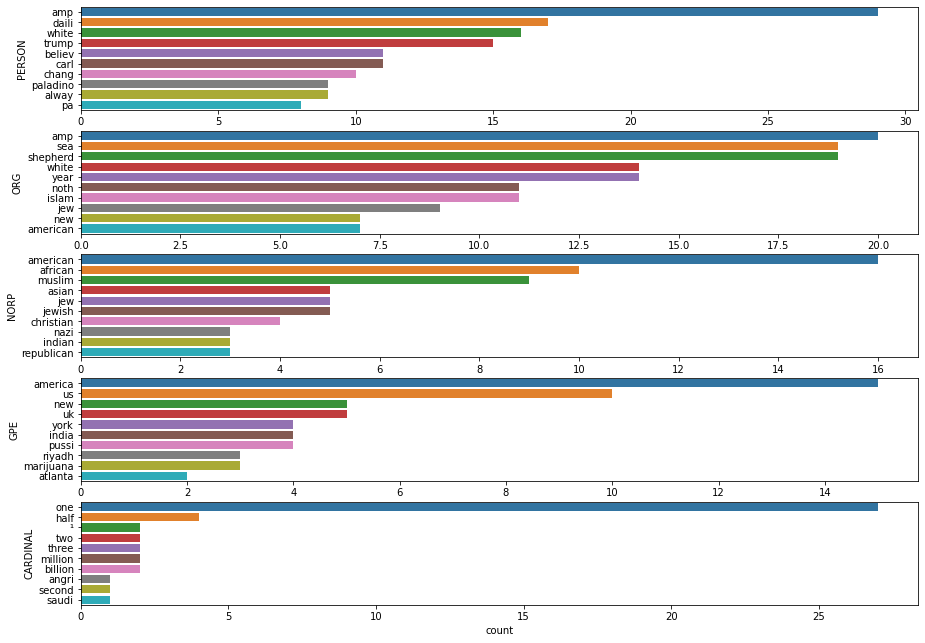

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [ ]:
entity = ["PERSON" , "ORG" , "NORP" , "GPE" , "CARDINAL"]
fig, axes = plt.subplots(nrows=len(entity), ncols=1, figsize=(15,11))
for i in range(len(entity)):
    plt.figure(figsize=(30 , 30))
    data = unique_words(entity[i],df_offencive)
    ax = sns.barplot(x="count", y=entity[i] , ax=axes[i] ,  data=data)

plt.show()

in no offencive data 

Amp Trump white are most common person  entity

Amp , islam , shepherd are most common words in entity ORG

In NORP we have most common words American , muslim , african , jewish

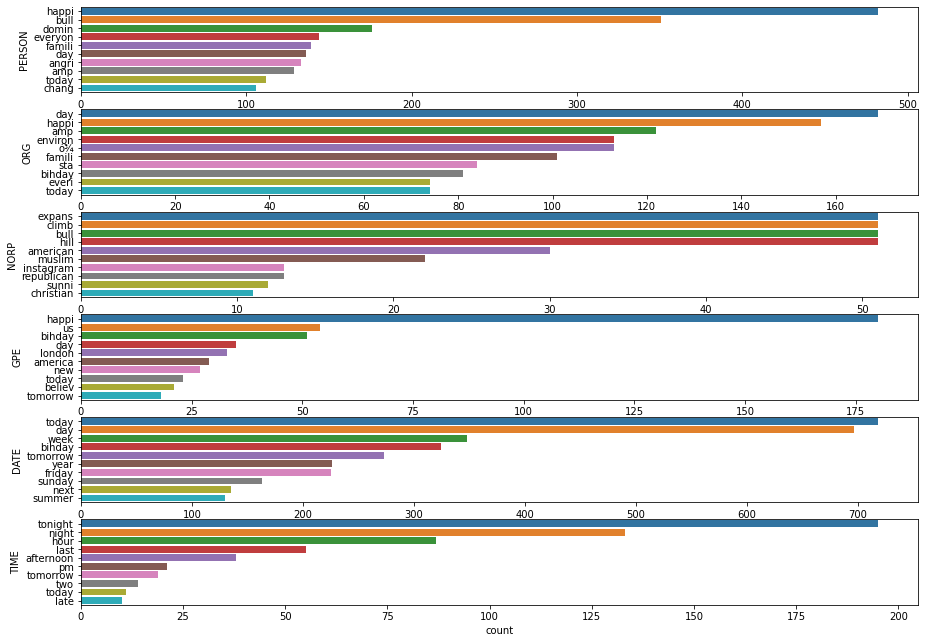

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

<Figure size 2160x2160 with 0 Axes>

In [ ]:
entity = ["PERSON" , "ORG" , "NORP" , "GPE" , "DATE" , "TIME"]
fig, axes = plt.subplots(nrows=len(entity), ncols=1, figsize=(15,11))
for i in range(len(entity)):
    plt.figure(figsize=(30 , 30))
    data = unique_words(entity[i],df_no_offencive)
    ax = sns.barplot(x="count", y=entity[i] , ax=axes[i] ,  data=data)

plt.show()

In person entity we have most common words happy ,family,everyone ,angry, amp

In NORP we have most common words  hill ,climb, American, Muslim, Republican, Instagram

In [ ]:
entity_List = []
count_NaN = 0

for tweet in tqdm(df["clean_tweet"]):

  text  = stopword_removal(tweet)

  doc = NER(text)

  entit = " ".join(str(doc.ents[0].label_) for i in range(len(doc.ents)))
  if entit == '':
    entity_List.append("NaN")
    count_NaN+=1

  else: entity_List.append(entit)

100%|██████████| 31962/31962 [04:40<00:00, 113.98it/s]


In [ ]:
df["entity"] = entity_List

In [ ]:
df.head(5)

,id,label,tweet,clean_tweet,entity
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON
1,2,0,@user @user thanks for #lyft credit i can't us...,thank credit use caus offer wheelchair van pdx,PERSON
2,3,0,bihday your majesty,bihday majesti,DATE
3,4,0,#model i love u take with u all the time in ...,love take time ur,NaN
4,5,0,factsguide: society now #motivation,factsguid societi,NaN


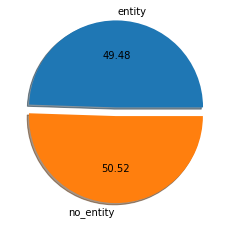

In [ ]:
y = np.array([entity_List.count("NaN") , len(entity_List)-entity_List.count("NaN")])
mylabels = ["entity" , "no_entity"]
myexplode = [0.1, 0]
plt.pie(y, labels = mylabels ,explode = myexplode  ,shadow = True  , autopct='%.2f')

plt.show() 

lets understand tweet Hashtag

In [ ]:
hashtag_list=[]
count= 0
for tweet in tqdm(df["tweet"]):
   hashtag = re.findall("#(\w+)", tweet)

   if hashtag == []:
     hashtag_list.append("NaN")
     count+=1
   else : hashtag_list.append(" ".join(hashtag))


df["hashtag"] = hashtag_list

100%|██████████| 31962/31962 [00:00<00:00, 362529.53it/s]


In [ ]:
df["hashtag"] = hashtag_list

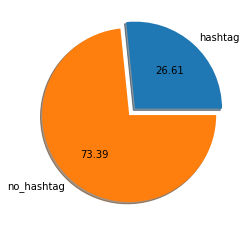

In [ ]:
y = np.array([count , len(df["tweet"])-count])
mylabels = ["hashtag" , "no_hashtag"]
myexplode = [0.1, 0]
plt.pie(y, labels = mylabels ,explode = myexplode  ,shadow = True  , autopct='%.2f')

plt.show() 

26% of data contain hashtags

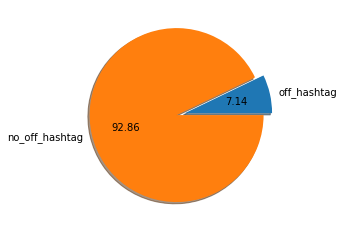

In [ ]:
off_hash = len(df[(df['label'] == 1) & (df['hashtag'] == "NaN")])
no_off_hash = len(df[(df['label'] == 0) & (df['hashtag'] == "NaN")])
NaN_total =len(df[df['hashtag'] == "NaN"])

y = np.array([off_hash ,no_off_hash ])
mylabels = [ "off_hashtag" ,"no_off_hashtag" ]
myexplode = [0.1,0]
plt.pie(y, labels = mylabels ,explode = myexplode  ,shadow = True  , autopct='%.2f')

plt.show() 

we have total 26% which have hashtag in it

7% data contain ofensive hashtag

19% data contain no offensive hashtag

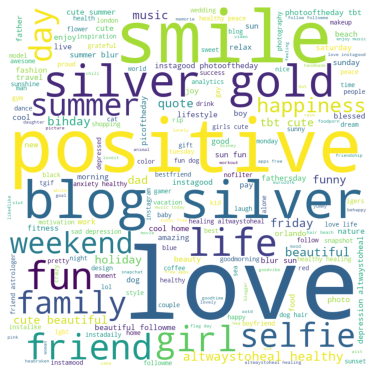

In [ ]:
label = 0 
words = ""
for i in df[df["label"]==label]["hashtag"]:
  if i == "NaN":continue
    
  else: words += "".join(str(x) for x in i)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 8).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (5 , 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

most common hashatag in non offencive hashtag - smile , love , positive , family , friend

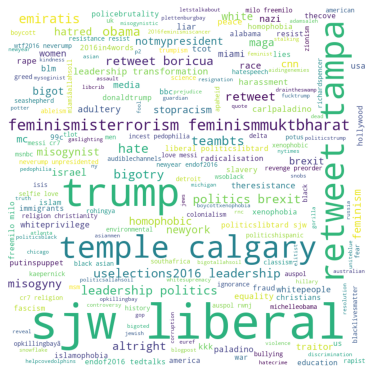

In [ ]:
label = 1
words = ""
for i in df[df["label"]==label]["hashtag"]:
  if i == "NaN":continue
    
  else: words += "".join(str(x) for x in i)

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 8).generate(words)

# plot the WordCloud image                      
plt.figure(figsize = (5 , 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

most common offensive hahtags are trump , politics , allahsoil , libtrad , temple

100%|██████████| 29720/29720 [00:00<00:00, 643960.82it/s]


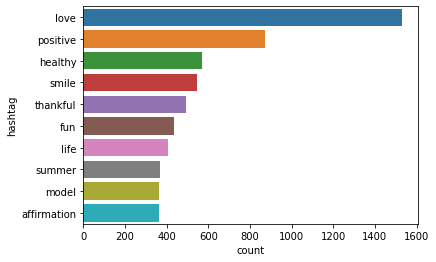

In [ ]:
label = 0 
top_hashtags = 10

non_ofensive_hashtag = []
for i in tqdm(df[df["label"]==label]["hashtag"]):
  if i=="NaN":continue

  else:non_ofensive_hashtag.extend(i.split(" "))

values, counts = np.unique(non_ofensive_hashtag , return_counts=True)


data=  pd.DataFrame(list(zip(values, counts)), columns =["hashtag", 'count'])

data =data.sort_values(by=['count'], ascending=False).head(10)

ax = sns.barplot(x="count", y="hashtag" ,  data=data)

most common hashatag in non offencive hashtag - smile , love , positive , family , friend

100%|██████████| 2242/2242 [00:00<00:00, 619556.57it/s]


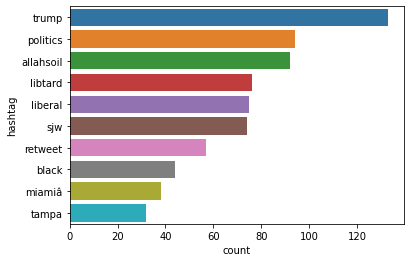

In [ ]:
label = 1
top_hashtags = 10

offensive_hashtag = []
for i in tqdm(df[df["label"]==label]["hashtag"]):
  if i=="NaN":continue

  else:offensive_hashtag.extend(i.split(" "))

values, counts = np.unique(offensive_hashtag , return_counts=True)


data=  pd.DataFrame(list(zip(values, counts)), columns =["hashtag", 'count'])

data =data.sort_values(by=['count'], ascending=False).head(top_hashtags)

ax = sns.barplot(x="count", y="hashtag" ,  data=data)

most common offensive hahtags are trump , politics , allahsoil , libtrad

In [ ]:
vectorizer = CountVectorizer(
                            max_features=100,
                             min_df=5)
bag = vectorizer.fit_transform(df.hashtag.fillna(' '))

print(vectorizer.get_feature_names())
print("unique no. of BOW words = "  , len(vectorizer.vocabulary_))

hashtag= bag.toarray()
# X_test_hashtag = vectorizer.transform(X_test["hashtag"]).toarray()

['2016', 'affirmation', 'allahsoil', 'altwaystoheal', 'amazing', 'baby', 'beach', 'beautiful', 'beauty', 'bihday', 'blessed', 'blog', 'cool', 'cute', 'dad', 'day', 'deletetweets', 'depression', 'dog', 'enjoy', 'euro2016', 'family', 'fashion', 'father', 'fathersday', 'fitness', 'follow', 'followme', 'food', 'forex', 'free', 'friday', 'friend', 'friends', 'fun', 'funny', 'girl', 'girls', 'gold', 'goodmorning', 'grateful', 'hair', 'happiness', 'happy', 'healing', 'health', 'healthy', 'holiday', 'home', 'hot', 'i_am', 'inspiration', 'instagood', 'joy', 'liberal', 'libtard', 'life', 'lifestyle', 'like', 'live', 'love', 'me', 'mindset', 'model', 'morning', 'motivation', 'music', 'nan', 'nature', 'orlando', 'pay', 'peace', 'photography', 'photooftheday', 'politics', 'positive', 'prayfororlando', 'proud', 'quote', 'quotes', 'retweet', 'rip', 'saturday', 'selfie', 'sexy', 'silver', 'sjw', 'smile', 'success', 'summer', 'sun', 'sunday', 'tbt', 'tgif', 'thankful', 'travel', 'trump', 'wedding', 'we

TSNE

In [ ]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(hashtag) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 31962 samples in 0.003s...
[t-SNE] Computed neighbors for 31962 samples in 22.373s...
[t-SNE] Computed conditional probabilities for sample 1000 / 31962
[t-SNE] Computed conditional probabilities for sample 2000 / 31962
[t-SNE] Computed conditional probabilities for sample 3000 / 31962
[t-SNE] Computed conditional probabilities for sample 4000 / 31962
[t-SNE] Computed conditional probabilities for sample 5000 / 31962
[t-SNE] Computed conditional probabilities for sample 6000 / 31962
[t-SNE] Computed conditional probabilities for sample 7000 / 31962
[t-SNE] Computed conditional probabilities for sample 8000 / 31962
[t-SNE] Computed conditional probabilities for sample 9000 / 31962
[t-SNE] Computed conditional probabilities for sample 10000 / 31962
[t-SNE] Computed conditional probabilities for sample 11000 / 31962
[t-SNE] Computed conditional probabilities for sample 12000 / 31962
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'HAshtag T-SNE projection')]

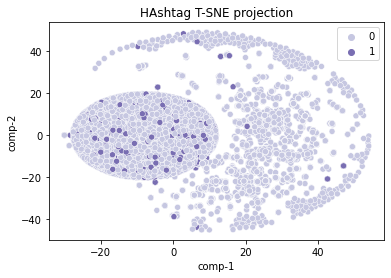

In [ ]:
tsne_data = pd.DataFrame()
tsne_data["y"] = df["label"]
tsne_data["comp-1"] = z[:,0]
tsne_data["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_data.y.tolist(),
                palette=sns.color_palette("Purples", 2),
                data=tsne_data).set(title="HAshtag T-SNE projection") 

T sne for hashtag cant able to seperate both classes

In [ ]:
#saving preprocessed data
df.to_csv(r'/content/drive/MyDrive/Twitter NLP/df_new.csv')

# **Modeling**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Twitter NLP/df_new.csv")
df=df.fillna(" ")
del df["Unnamed: 0"]

df.head(5)

,id,label,tweet,clean_tweet,entity,hashtag
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct,PERSON,run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank credit use caus offer wheelchair van pdx,PERSON,lyft disapointed getthanked
2,3,0,bihday your majesty,bihday majesti,DATE,
3,4,0,#model i love u take with u all the time in ...,love take time ur,,model
4,5,0,factsguide: society now #motivation,factsguid societi,,motivation


In [ ]:
X = df.drop(["tweet" ,  "id"  , "label"] , axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y ,  random_state=42)


In [ ]:
print(X_train.shape)
X_train.head(5)

(21414, 3)


,clean_tweet,entity,hashtag
22805,soft hea cruel world courag weak unk,PERSON,inspiration quote inspirational
22390,new chapter sta today,DATE,newjob
22471,readi love,,life future victory setmefree living peace
26845,food bodi,,healing doplants healthy
29602,provok neighbour nois say ever want trash hater,PERSON,southsudan scumbag uncivilised


Bag Of Words - 1 .Clean_Tweet

In [ ]:
vectorizer = CountVectorizer(
                            max_features=500 ,
                             min_df=5)
bag = vectorizer.fit_transform(X_train["clean_tweet"])

print(vectorizer.get_feature_names())
print("unique no. of BOW words = "  , len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

X_train_tweet = bag.toarray()
X_test_tweet = vectorizer.transform(X_test["clean_tweet"]).toarray()

['abl', 'accept', 'account', 'act', 'actual', 'adapt', 'ago', 'agre', 'almost', 'alreadi', 'also', 'alway', 'amaz', 'america', 'american', 'amp', 'angri', 'announc', 'anoth', 'anymor', 'anyon', 'anyth', 'app', 'around', 'arriv', 'ask', 'ass', 'attack', 'away', 'awesom', 'aww', 'babi', 'back', 'bad', 'beach', 'bear', 'beauti', 'becom', 'bed', 'begin', 'believ', 'best', 'better', 'big', 'bihday', 'bing', 'bird', 'bit', 'black', 'bless', 'bodi', 'bong', 'book', 'boy', 'break', 'bring', 'buffalo', 'bull', 'busi', 'buy', 'call', 'came', 'cant', 'car', 'care', 'cat', 'caus', 'celebr', 'chang', 'check', 'child', 'children', 'citi', 'class', 'climb', 'close', 'club', 'cold', 'come', 'comment', 'commun', 'complet', 'confer', 'continu', 'control', 'cool', 'could', 'count', 'countri', 'coupl', 'cours', 'crazi', 'creat', 'cri', 'cultur', 'custom', 'cute', 'dad', 'daddi', 'daili', 'danc', 'date', 'day', 'dead', 'dear', 'death', 'delet', 'deserv', 'despit', 'develop', 'die', 'differ', 'direct', 'dog

In [ ]:
X_train_tweet.shape , X_train.shape  , X_test_tweet.shape , X_test.shape

((21414, 500), (21414, 3), (10548, 500), (10548, 3))

Bag Of Words - Hashtag

In [ ]:
vectorizer = CountVectorizer(
                            max_features=100,
                             min_df=5)
bag = vectorizer.fit_transform(X_train["hashtag"])

print(vectorizer.get_feature_names())
print("unique no. of BOW words = "  , len(vectorizer.vocabulary_))

X_train_hashtag= bag.toarray()
X_test_hashtag = vectorizer.transform(X_test["hashtag"]).toarray()

['2016', 'affirmation', 'allahsoil', 'altwaystoheal', 'amazing', 'baby', 'beach', 'beautiful', 'beauty', 'bihday', 'black', 'blessed', 'blog', 'cool', 'cute', 'dad', 'day', 'deletetweets', 'depression', 'dog', 'enjoy', 'euro2016', 'family', 'fashion', 'father', 'fathersday', 'fitness', 'follow', 'followme', 'food', 'forex', 'free', 'friday', 'friend', 'friends', 'fun', 'funny', 'girl', 'girls', 'gold', 'goodmorning', 'grateful', 'hair', 'happiness', 'happy', 'healing', 'health', 'healthy', 'holiday', 'home', 'hot', 'i_am', 'inspiration', 'instagood', 'joy', 'lgbt', 'liberal', 'libtard', 'life', 'like', 'live', 'london', 'love', 'me', 'mindset', 'model', 'motivation', 'music', 'nature', 'new', 'orlando', 'pay', 'peace', 'photooftheday', 'politics', 'positive', 'prayfororlando', 'proud', 'quote', 'quotes', 'retweet', 'rip', 'saturday', 'selfie', 'sexy', 'silver', 'sjw', 'smile', 'success', 'summer', 'sun', 'sunday', 'tbt', 'tgif', 'thankful', 'travel', 'trump', 'wedding', 'weekend', 'wor

In [ ]:
X_test_hashtag.shape ,X_test_hashtag.shape

((10548, 100), (10548, 100))

Bag Of Words - entity

In [ ]:
vectorizer = CountVectorizer(
                            max_features=25,
                             min_df=5)
bag = vectorizer.fit_transform(X_train["entity"])

print(vectorizer.get_feature_names())
print("unique no. of BOW words = "  , len(vectorizer.vocabulary_))

X_train_entity= bag.toarray()
X_test_entity = vectorizer.transform(X_test["entity"]).toarray()

['cardinal', 'date', 'event', 'fac', 'gpe', 'language', 'loc', 'norp', 'ordinal', 'org', 'person', 'product', 'time', 'work_of_art']
unique no. of BOW words =  14


DROPING TEXT COLUMNS 

CONCAT array  BOW -  CLEAN_TWEET , HASHTAG  ,  ENTITY

In [ ]:
X_train = X_train.drop(["clean_tweet" , "hashtag" , "entity"] , axis=1)
X_test =  X_test.drop(["clean_tweet" , "hashtag" ,"entity"] , axis=1)

X_train=pd.concat([pd.DataFrame(np.array(X_train)), pd.DataFrame(X_train_tweet) ,pd.DataFrame(X_train_hashtag) ,pd.DataFrame(X_train_entity) ], axis=1)
X_test=pd.concat([pd.DataFrame(np.array(X_test)), pd.DataFrame(X_test_tweet) ,pd.DataFrame(X_test_hashtag), pd.DataFrame(X_test_entity)], axis=1)

**BASELINE MODEL**

In [ ]:
print(y_test.value_counts())

0    9808
1     740
Name: label, dtype: int64


In [ ]:
test_pred_base = np.zeros(y_test.shape[0])

print(accuracy_score(y_test,test_pred_base))
print(f1_score(y_test,test_pred_base, average='macro'))


0.9298445202882063
0.4818235409707211


we will set baseline f1 score as 0.48

if model is not learning anything then it will just return 0 as predicted classs

In [ ]:
def gridsearch(model ,parameters):

  result = GridSearchCV(model, parameters)
  result.fit(X_train, y_train)

  return result.best_params_


def performance_score(model , X_test , y_test):
  model =model.fit(X_train, y_train)

  test_pred = model.predict(X_test)
  print("Accuracy        : ", model.score(X_test, y_test))
  print("F1 score        : ", f1_score(y_test, test_pred, average='macro'))
  print("recall score    : " , recall_score(y_test, test_pred  , average='macro'))
  print("precision score : " , precision_score(y_test, test_pred ,  average='macro'))
  print("----------Classiffication Report--------")
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test,test_pred, target_names=target_names))
  print("----------confusion Matrix--------")
  print(plot_confusion_matrix(model,X_test , y_test) )

  return  

**Gaussian Naive Bayes**

class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09)

In [ ]:
%%time
model =GaussianNB()

parameters = { 'var_smoothing':[ 1e-02 ,1e-03, 1e-05 , 1e-09,  1e-012,1e-015 ]}
print( "best grid search param :", gridsearch(model ,parameters))


best grid search param : {'var_smoothing': 0.001}
CPU times: user 9.06 s, sys: 104 ms, total: 9.16 s
Wall time: 10.4 s


Accuracy        :  0.6462836556693212
F1 score        :  0.5140046601951818
recall score    :  0.7579482827035845
precision score :  0.569659175070504
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.99      0.63      0.77      9808
     class 1       0.15      0.89      0.26       740

    accuracy                           0.65     10548
   macro avg       0.57      0.76      0.51     10548
weighted avg       0.93      0.65      0.73     10548

----------confusion Matrix--------


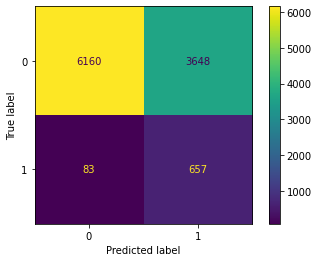

In [ ]:
model =GaussianNB(var_smoothing =0.001)
performance_score(model , X_test , y_test)

our baseline model give us f1 score 0.48 , as our baseline model just predict 0 as output

GNB give 0.51 as f1 score which is close to baseline model 


**LOGISTIC REGRESSION** - BOW [clean Tweet , Hashtag , entity] 

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]¶

In [ ]:
%%time
model = LogisticRegression(random_state=0, n_jobs=-1 )


parameters = {'solver':('lbfgs', 'saga') , 
              'penalty':("l1", "l2") ,
              'C':[ 1 , 1.5 , 2 , 2.5 , 3.0  ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
CPU times: user 20.9 s, sys: 11.6 s, total: 32.5 s
Wall time: 23min 42s


Accuracy        :  0.94548729616989
F1 score        :  0.7100158214480429
recall score    :  0.6545905714033773
precision score :  0.8614436407037482
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97      9808
     class 1       0.77      0.32      0.45       740

    accuracy                           0.95     10548
   macro avg       0.86      0.65      0.71     10548
weighted avg       0.94      0.95      0.93     10548

----------confusion Matrix--------


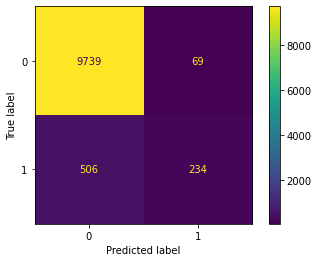

In [ ]:
model = LogisticRegression(random_state=0 , C= 1, penalty ='l2', solver='lbfgs')
performance_score(model , X_test , y_test)

3209 data point correctly prredicted as 0 and 71 correctly predicted as 1

their are over 173 data points is belong to class 1 but model predicting as 0





we have good presion and recall for class 0 .
f1 score for class 0 giving score 0.97

but model cant able to classify class 1 correctly we got just 0.41 f1 score for class 0

overall we get goood f1 score of 0.69 which is better than our baseline model and GNB.

but model cant able to classify class 0 corectly so i will try some complex model now.

SVM

class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

In [ ]:
%%time
model= SVC(random_state=0)

parameters = {'kernel':('rbf', 'poly') , 
              'C':[ 0.0001 , 0.001 , 0.01 , 0.1 , 1  ]}
              
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'C': 1, 'kernel': 'rbf'}
CPU times: user 46min 39s, sys: 4.72 s, total: 46min 43s
Wall time: 46min 33s


In [ ]:
model = SVC(random_state=0 , C= 1, kernel='rbf')
performance_score(model , X_test , y_test)

svm giving as perfect recall score for class 0 

we get same f1 score for class 0 for logistic reg and svm 

svm perform slighly better for classifying class 1 , we get f1 score = 0.41 .f1 score is not good but we get some better result than logistic reg.


overall svm give us f1 score = 0.70 

DECESION TREE

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

min_samples_split: The minimum number of samples a node must contain in order to consider splitting. The default value is two. You can use this parameter to regularize your tree.

min_samples_leaf: The minimum number of samples needed to be considered a leaf node. The default value is set to one. Use this parameter to limit the growth of the tree.

In [ ]:
%%time
model= DecisionTreeClassifier(random_state=0)

parameters = {'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15}
CPU times: user 2min 15s, sys: 786 ms, total: 2min 15s
Wall time: 2min 20s


Accuracy        :  0.9452028820629503
F1 score        :  0.6925255920026063
recall score    :  0.635696728539306
precision score :  0.8886197801989668
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.95      1.00      0.97      9808
     class 1       0.83      0.28      0.41       740

    accuracy                           0.95     10548
   macro avg       0.89      0.64      0.69     10548
weighted avg       0.94      0.95      0.93     10548

----------confusion Matrix--------


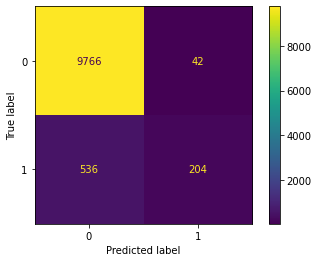

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",
                            max_depth= 15,
                            min_samples_leaf= 2,
                            min_samples_split= 15 ,random_state=0)

performance_score(model , X_test , y_test)

DT performing same as svm to classify class 0 but DT cant able to classify class 1 better than SVM

RANDOM FOREST

class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]

In [ ]:
%%time
model = RandomForestClassifier(random_state=0 , n_jobs=-1)

parameters = {"n_estimators" :[50 , 100 , 200] , 
              'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
CPU times: user 6min 19s, sys: 40.5 s, total: 6min 59s
Wall time: 28min 39s


Accuracy        :  0.9343003412969283
F1 score        :  0.5437734202051738
recall score    :  0.5323814536396103
precision score :  0.9568403987940542
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.93      1.00      0.97      9808
     class 1       0.98      0.06      0.12       740

    accuracy                           0.93     10548
   macro avg       0.96      0.53      0.54     10548
weighted avg       0.94      0.93      0.91     10548

----------confusion Matrix--------


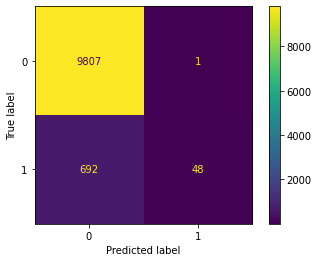

In [ ]:
model = RandomForestClassifier(criterion ='entropy' ,
                            max_depth=15,
                            min_samples_leaf =2,
                            min_samples_split =5 ,
                            random_state=0 , n_jobs=-1)

performance_score(model , X_test , y_test)

RF just predicting 0 as class label 

it only predict 15 data point as class 1

**Mean W2V tfidf**

 mean w2v clean_tweet

In [ ]:
X = df.drop(["tweet" ,  "id"  , "label"] , axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y ,  random_state=42)

In [ ]:
X_train.head(2)

,clean_tweet,entity,hashtag
22805,soft hea cruel world courag weak unk,PERSON,inspiration quote inspirational
22390,new chapter sta today,DATE,newjob


In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
def mean_w2v(data , dict_):
  vecs=[]
  for text in tqdm(data):
    doc1 = nlp(text) 
    mean_vec = np.zeros([len(doc1) , len(doc1[0].vector)])

 
    for i , word1 in enumerate(doc1):
      vec1 = word1.vector
      try:
        idf = dict_[str(word1)]
      except: idf=0
      mean_vec[i] += vec1 * idf

    mean_vec = mean_vec.mean(axis=0)
    vecs.append(mean_vec)


  return vecs

In [ ]:
tfidf = TfidfVectorizer(lowercase=True,max_features=500 )
tfidf.fit_transform(X_train["clean_tweet"])

# # dict key:word and value:tf-idf score
word2tfidf_tweet = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

X_train_w2vtfidf_tweet =mean_w2v(X_train["clean_tweet"] , word2tfidf_tweet)

X_test_w2vtfidf_tweet =mean_w2v(X_test["clean_tweet"] , word2tfidf_tweet)

100%|██████████| 10548/10548 [01:33<00:00, 112.34it/s]


In [ ]:
X_train_w2vtfidf_tweet[0].shape

(96,)

 mean w2v hashtag

In [ ]:
tfidf = TfidfVectorizer(lowercase=True,max_features=100 )
tfidf.fit_transform(X_train["hashtag"])

# # dict key:word and value:tf-idf score
word2tfidf_hashtag = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

X_train_w2vtfidf_hashtag =mean_w2v(X_train["hashtag"] , word2tfidf_hashtag)

X_test_w2vtfidf_hashtag =mean_w2v(X_test["hashtag"] , word2tfidf_hashtag)

100%|██████████| 10548/10548 [01:31<00:00, 115.13it/s]


In [ ]:
X_train_w2vtfidf_hashtag[0].shape

(96,)

 mean w2v entity

In [ ]:
vectorizer = CountVectorizer(
                            max_features=25,
                             min_df=5)
bag = vectorizer.fit_transform(X_train["entity"])

print(vectorizer.get_feature_names())
print("unique no. of BOW words = "  , len(vectorizer.vocabulary_))

X_train_entity= bag.toarray()
X_test_entity = vectorizer.transform(X_test["entity"]).toarray()

['cardinal', 'date', 'event', 'fac', 'gpe', 'language', 'loc', 'norp', 'ordinal', 'org', 'person', 'product', 'time', 'work_of_art']
unique no. of BOW words =  14


DROPING TEXT COLUMNS 

CONCAT array  BOW -  CLEAN_TWEET , HASHTAG  ,  ENTITY

In [ ]:
X_train = X_train.drop(["clean_tweet" , "hashtag" , "entity"] , axis=1)
X_test =  X_test.drop(["clean_tweet" , "hashtag" ,"entity"] , axis=1)

In [ ]:
X_train=pd.concat([pd.DataFrame(np.array(X_train)), pd.DataFrame(X_train_w2vtfidf_tweet) ,pd.DataFrame(X_train_w2vtfidf_hashtag) ,pd.DataFrame(X_train_entity) ], axis=1)
X_test=pd.concat([pd.DataFrame(np.array(X_test)), pd.DataFrame(X_test_w2vtfidf_tweet) ,pd.DataFrame(X_test_w2vtfidf_hashtag), pd.DataFrame(X_test_entity)], axis=1)

In [ ]:
%%time
model =GaussianNB()

parameters = { 'var_smoothing':[ 1e-02 ,1e-03, 1e-05 , 1e-09,  1e-012,1e-015 ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'var_smoothing': 1e-05}
CPU times: user 2.49 s, sys: 35 ms, total: 2.52 s
Wall time: 2.54 s


Accuracy        :  0.3755214258627228
F1 score        :  0.33415844532670247
recall score    :  0.6179751223491028
precision score :  0.5354028030454414
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.98      0.34      0.50      9808
     class 1       0.09      0.90      0.17       740

    accuracy                           0.38     10548
   macro avg       0.54      0.62      0.33     10548
weighted avg       0.92      0.38      0.48     10548

----------confusion Matrix--------


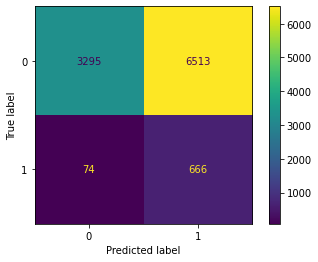

In [ ]:
model =GaussianNB(var_smoothing =1e-05)
performance_score(model , X_test , y_test)

In [ ]:
%%time
model = KNeighborsClassifier( n_jobs=-1 )


parameters = {
              'n_neighbors':[5 , 10 , 15 , 20  ]}
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'n_neighbors': 10}
CPU times: user 1min 22s, sys: 3.56 s, total: 1min 26s
Wall time: 1min 16s


Accuracy        :  0.9408418657565415
F1 score        :  0.6332092187199077
recall score    :  0.5883735285040342
precision score :  0.9167151767151767
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97      9808
     class 1       0.89      0.18      0.30       740

    accuracy                           0.94     10548
   macro avg       0.92      0.59      0.63     10548
weighted avg       0.94      0.94      0.92     10548

----------confusion Matrix--------


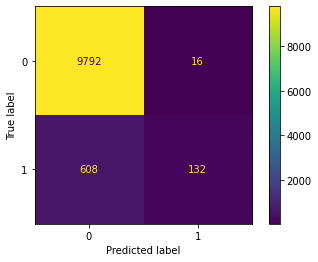

In [ ]:
model = KNeighborsClassifier( n_neighbors=10 ,n_jobs=-1 )
performance_score(model , X_test , y_test)

Logistic Regression

In [ ]:
%%time
model = LogisticRegression(random_state=0, n_jobs=-1 )

parameters = {'solver':('lbfgs', 'saga') , 
              'penalty':("l1", "l2") ,
              'C':[ 1 , 1.5 , 2 , 2.5 , 3.0  ]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'C': 1.5, 'penalty': 'l1', 'solver': 'saga'}
CPU times: user 17.1 s, sys: 9.23 s, total: 26.4 s
Wall time: 8min 10s


Accuracy        :  0.9371444823663254
F1 score        :  0.6047490091630342
recall score    :  0.5701432366297783
precision score :  0.8621498767566184
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97      9808
     class 1       0.79      0.14      0.24       740

    accuracy                           0.94     10548
   macro avg       0.86      0.57      0.60     10548
weighted avg       0.93      0.94      0.92     10548

----------confusion Matrix--------


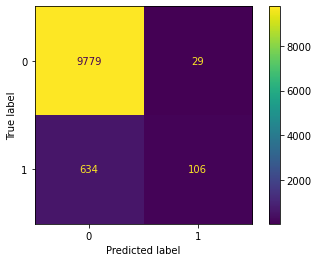

In [ ]:
model = LogisticRegression(random_state=0 , C= 1.5, penalty ='l1', solver='saga')
performance_score(model , X_test , y_test)

BOW models give us some good result , but m2v feature cant able to classify class 1 .
so i will try 1 or 2 model to check is we get any better result.

SVM

In [ ]:
%%time
model= SVC(random_state=0)

parameters = {'kernel':('rbf', 'poly') , 
              'C':[ 0.0001 , 0.001 , 0.01 , 0.1 , 1  ]}
              
print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'C': 1, 'kernel': 'rbf'}
CPU times: user 10min 30s, sys: 2.21 s, total: 10min 32s
Wall time: 10min 29s


Accuracy        :  0.9380925293894578
F1 score        :  0.5993040717457422
recall score    :  0.5656554494951722
precision score :  0.9187912125577076
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97      9808
     class 1       0.90      0.13      0.23       740

    accuracy                           0.94     10548
   macro avg       0.92      0.57      0.60     10548
weighted avg       0.94      0.94      0.92     10548

----------confusion Matrix--------


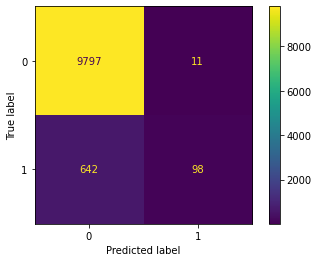

In [ ]:
model = SVC(random_state=0 , C= 1, kernel='rbf')
performance_score(model , X_test , y_test)

SVM is just predicting 0 as class label .

we get same f1 score as our baseline model.

DT

In [ ]:
%%time
model= DecisionTreeClassifier(random_state=0)

parameters = {'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 15}
CPU times: user 16min 58s, sys: 1.48 s, total: 17min
Wall time: 16min 55s


Accuracy        :  0.9352483883200606
F1 score        :  0.5855696722591655
recall score    :  0.5578791168819717
precision score :  0.8384889098030621
----------Classiffication Report--------
              precision    recall  f1-score   support

     class 0       0.94      1.00      0.97      9808
     class 1       0.74      0.12      0.20       740

    accuracy                           0.94     10548
   macro avg       0.84      0.56      0.59     10548
weighted avg       0.92      0.94      0.91     10548

----------confusion Matrix--------


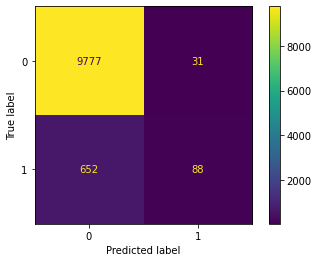

In [ ]:
model = DecisionTreeClassifier(criterion="entropy",
                            max_depth= 7,
                            min_samples_leaf= 7,
                            min_samples_split= 15 ,random_state=0)

performance_score(model , X_test , y_test)

stil model is not improving.

we have 80:10 class ratio thats why model cant able to correctly classify 

In [ ]:
%%time
model = RandomForestClassifier(random_state=0 , n_jobs=-1)

parameters = {"n_estimators" :[50 , 100 , 200] , 
              'max_depth':[2 , 5, 7 ,10 ,15 ] , 
              'min_samples_split':[5 , 10 , 15] ,              
              'min_samples_leaf':[2 , 5, 7 ,10 ,15 ] , 
              'criterion': ["entropy"]}

print( "best grid search param :", gridsearch(model ,parameters))

best grid search param : {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
CPU times: user 11min 33s, sys: 47.5 s, total: 12min 20s
Wall time: 3h 33min 6s


In [ ]:
model = RandomForestClassifier(criterion ='entropy' ,
                            max_depth=15,
                            min_samples_leaf =2,
                            min_samples_split =10 ,
                            random_state=0 , n_jobs=-1)

performance_score(model , X_test , y_test)